# SENTIMENT ANALYSIS ON SOCIAL MEDIA

# LOAD DATA

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Load the dataset

df = pd.read_csv(r"C:\Users\SS\Downloads\archive (9).zip")

Data Overview

In [12]:
df.head

<bound method NDFrame.head of      Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
728  

data cleaning

In [13]:
df['Sentiment'] = df['Sentiment'].str.strip()
df['Platform'] = df['Platform'].str.strip().str.capitalize()

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

# Check for missing values
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

EDA


C:\Users\SS\AppData\Local\Temp\ipykernel_1408\3817047558.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_df["Sentiment"], palette="viridis", order=top_20_sentiments)


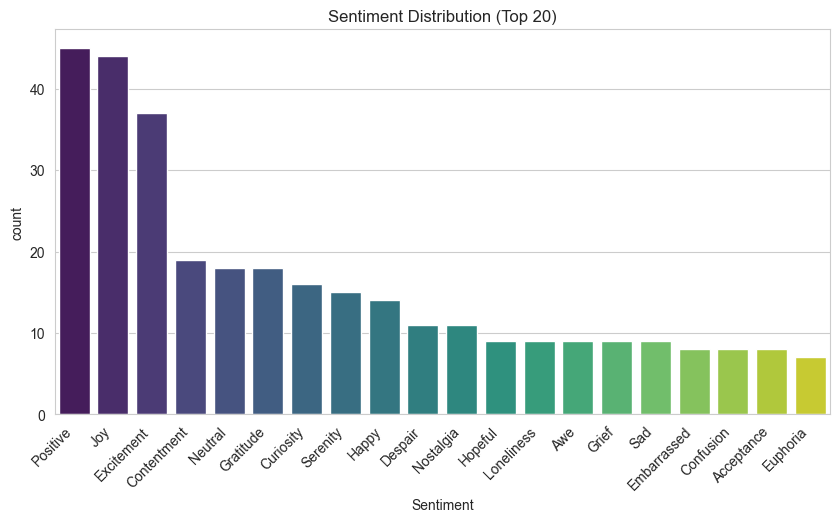

In [14]:
sns.set_style("whitegrid")
# Get the top 20 most used sentiments
top_20_sentiments = df["Sentiment"].value_counts().nlargest(20).index
filtered_df = df[df["Sentiment"].isin(top_20_sentiments)]

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.countplot(x=filtered_df["Sentiment"], palette="viridis", order=top_20_sentiments)
plt.title("Sentiment Distribution (Top 20)")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better visibility

plt.show()


C:\Users\SS\AppData\Local\Temp\ipykernel_1408\2412605434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Platform"], palette="pastel")


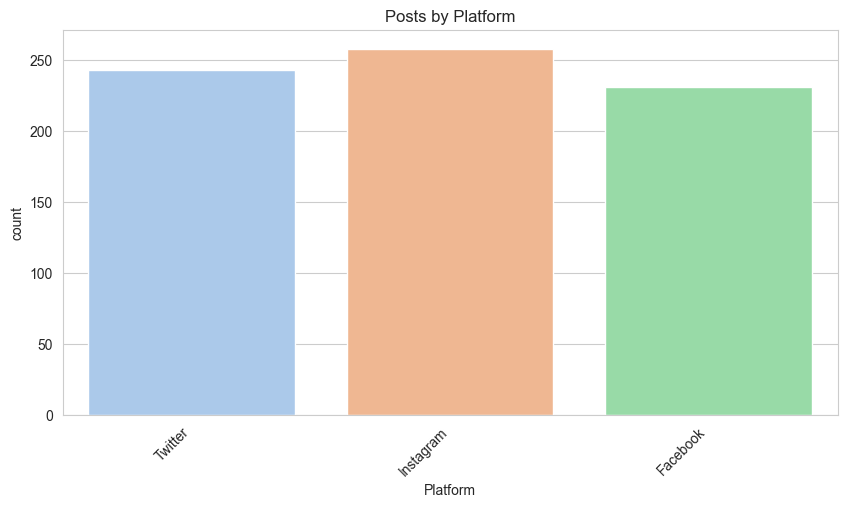

In [15]:
plt.figure(figsize=(10, 5))

sns.countplot(x=df["Platform"], palette="pastel")
plt.title("Posts by Platform")
plt.xticks(rotation=45, ha="right")

plt.show()

C:\Users\SS\AppData\Local\Temp\ipykernel_1408\3432615728.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Likes', data=df_filtered, palette={'Positive': 'green', 'Negative': 'red'})


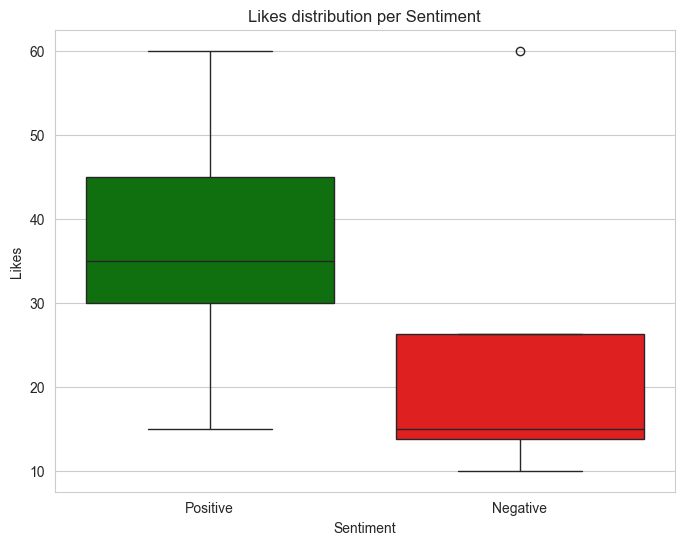

In [16]:
# Filter sentiments "Positive" and "Negative"
df_filtered = df[df['Sentiment'].isin(['Positive', 'Negative'])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Likes', data=df_filtered, palette={'Positive': 'green', 'Negative': 'red'})

plt.title('Likes distribution per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Likes')

plt.show()

C:\Users\SS\AppData\Local\Temp\ipykernel_1408\1657223533.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', ci=None)


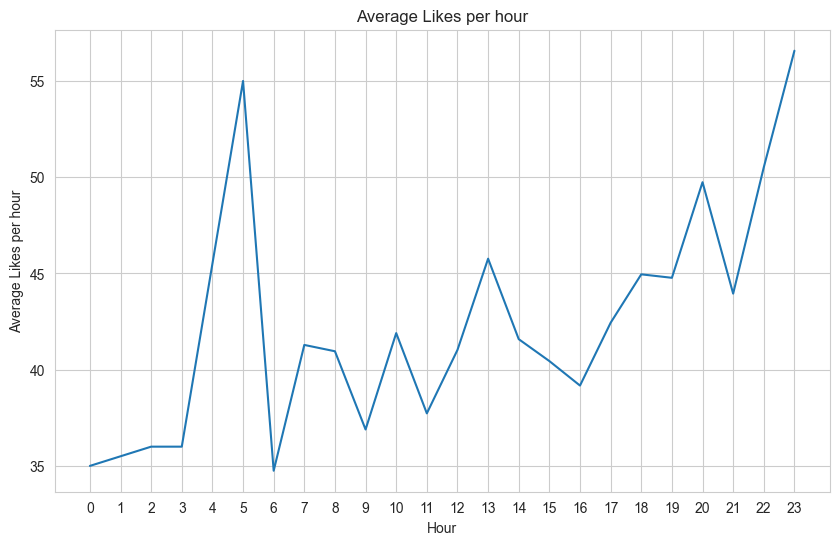

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', ci=None)
plt.title("Average Likes per hour")
plt.xlabel("Hour")
plt.ylabel("Average Likes per hour")
plt.xticks(range(0, 24))
plt.show()

C:\Users\SS\AppData\Local\Temp\ipykernel_1408\1878349913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Platform'], y=df['Likes'], estimator='mean', palette="Set2")


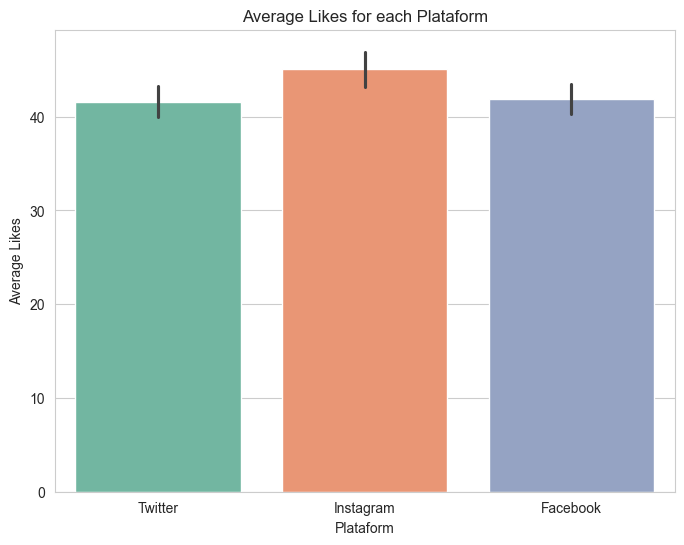

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Platform'], y=df['Likes'], estimator='mean', palette="Set2")
plt.title("Average Likes for each Plataform")
plt.xlabel("Plataform")
plt.ylabel("Average Likes")
plt.show()

In [ ]:
# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib


X = df['Text']
y = df['Sentiment']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Vectorize text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 6. Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 7. Predict and evaluate
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))

# 8. Save model and vectorizer
joblib.dump(model, 'sentiment_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')


Accuracy: 0.14285714285714285


['vectorizer.joblib']

C:\Users\SS\AppData\Local\Temp\ipykernel_1408\2703264822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


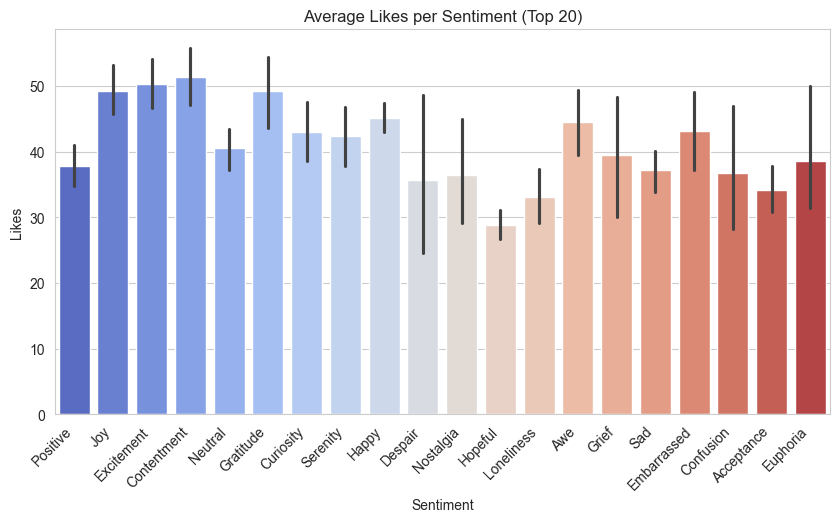

In [19]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x=filtered_df["Sentiment"], 
    y=filtered_df["Likes"], 
    palette="coolwarm", 
    order=top_20_sentiments
)
plt.title("Average Likes per Sentiment (Top 20)")
plt.xticks(rotation=45, ha="right")

plt.show()

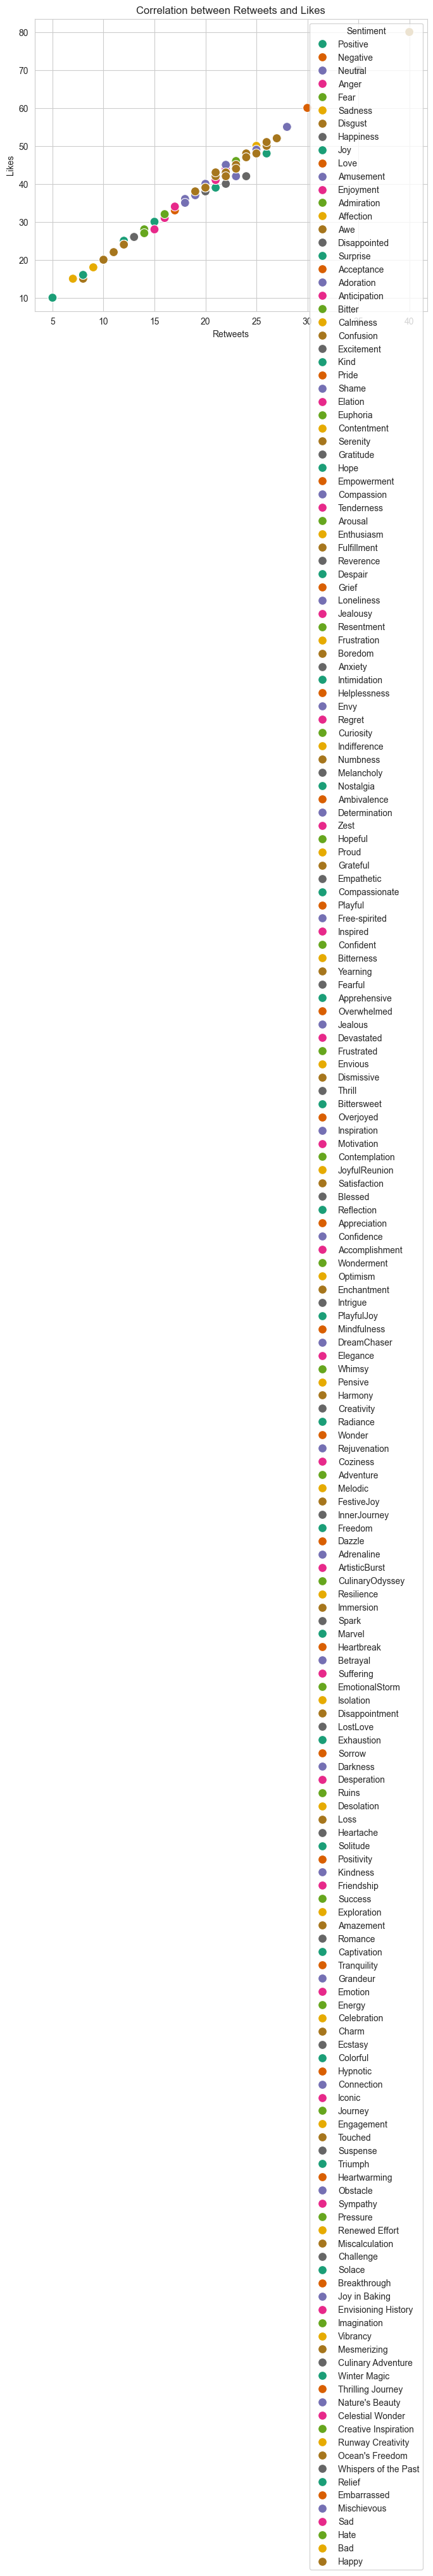

In [20]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df["Retweets"], y=df["Likes"], hue=df["Sentiment"], palette="Dark2", s=100)
plt.title("Correlation between Retweets and Likes")

plt.show()

In [26]:
!pip install nltk



   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 12.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import nltk
nltk.download('punkt')  # Only needed for tokenization


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [38]:
pip install networkx


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ------------------------------ --------- 1.6/2.0 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import networkx as nx

G = nx.Graph()
G.add_edge('A', 'B')
print(G.edges())


[('A', 'B')]


In [40]:
import networkx as nx


In [43]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Only needs to be done once


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


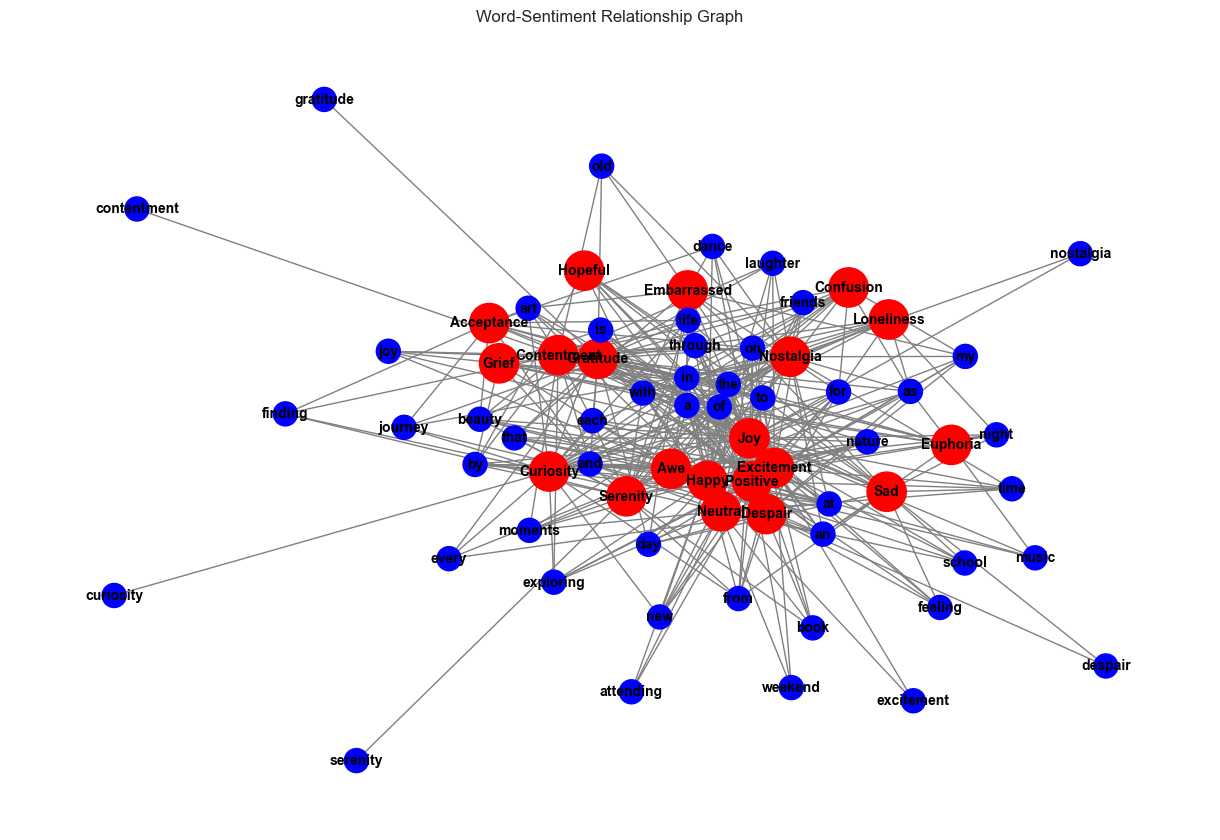

In [45]:
# Ensure you have the necessary NLTK data
nltk.download('punkt')
# Create a NetworkX graph
G = nx.Graph()

# Tokenize words from the "Text" column and count occurrences
word_sentiment_edges = []
word_counts = Counter()

for _, row in filtered_df.iterrows():
    words = word_tokenize(row["Text"].lower())  # Tokenize and convert to lowercase
    sentiment = row["Sentiment"]
    
    for word in words:
        if word.isalpha():  # Only keep alphabetic words (remove punctuation, numbers)
            word_counts[word] += 1
            word_sentiment_edges.append((word, sentiment))

# Select the **most frequent words** to avoid clutter (Top 50 words)
top_words = [word for word, count in word_counts.most_common(50)]

# Add nodes (Sentiments and Words)
for sentiment in top_20_sentiments:
    G.add_node(sentiment, color="red", size=800)  # Sentiments in Red

for word in top_words:
    G.add_node(word, color="blue", size=300)  # Words in Blue

# Add edges only if the word is in the top 50
for word, sentiment in word_sentiment_edges:
    if word in top_words:
        G.add_edge(word, sentiment)

# Extract node colors and sizes
node_colors = [G.nodes[node]["color"] for node in G.nodes()]
node_sizes = [G.nodes[node]["size"] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization

nx.draw(
    G, pos, with_labels=True, node_color=node_colors, 
    node_size=node_sizes, edge_color="gray", font_size=10, font_weight="bold"
)

plt.title("Word-Sentiment Relationship Graph")
plt.show()

In [50]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Step 2: Prepare data
X = df['Text']         # Independent variable (text)
y = df['Sentiment']    # Target variable (labels)

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Accuracy: 0.22
                      precision    recall  f1-score   support

          Acceptance       1.00      0.50      0.67         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.00      0.00      0.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         3
                 Awe       0.00      0.00      0.00         2
                 Bad       0.00      0.00      0.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00         1
         Bittersweet       0.00      0.00      0.00         1
             Boredom       0.00      0.00      0.00         1
            Calmness       0.00      0.00      0.00   

c:\Users\SS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

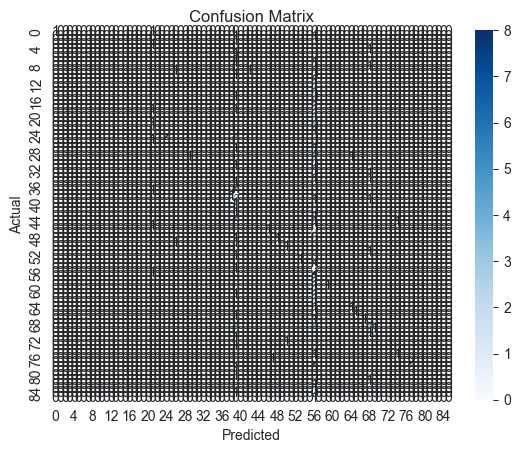

In [51]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate
y_pred = model.predict(X_test_vec)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.22
                      precision    recall  f1-score   support

          Acceptance       1.00      1.00      1.00         2
          Admiration       0.00      0.00      0.00         2
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.00      0.00      0.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         3
                 Awe       0.00      0.00      0.00         2
                 Bad       0.00      0.00      0.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00         1
         Bittersweet       0.00      0.00      0.00         1
             Boredom       0.00      0.00      0.00         1
            Calmness       0.00   

c:\Users\SS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

In [18]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

# SAVE THE MODEL


In [20]:
import joblib
joblib.dump(model, 'sentiment_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')


['vectorizer.joblib']